# TIME SERIES - ANALYSIS and FORECASTING

#Time series forecasting is a techniques for the prediction of events through a sequence of time. The techniques predict future events by analyzing the trends of the past. Below is air passenger data that we will analyze and predict the number of passenger in future.

# 1. EDA

In [1]:
#laoding useful packages libraries and importing data

import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization

In [2]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
#For time series data, the index must be 'Date', now we convert date into index by using column "Month" to convert

import pandas as pd
import datetime

In [6]:
#converting 'Month' as the object to datetime type

data.Month = pd.to_datetime(data.Month)

In [260]:
dataset_ts=data.set_index("Month")
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [261]:
#Moving data from Non-stationary to stationary by removing the trend call Detrending

#Detrending

dataset_ts['#Passengers'] - dataset_ts['#Passengers'].shift(1)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

In [263]:
dataset_ts['#Passengers'].diff(1) #Using diff function for shifting(1)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

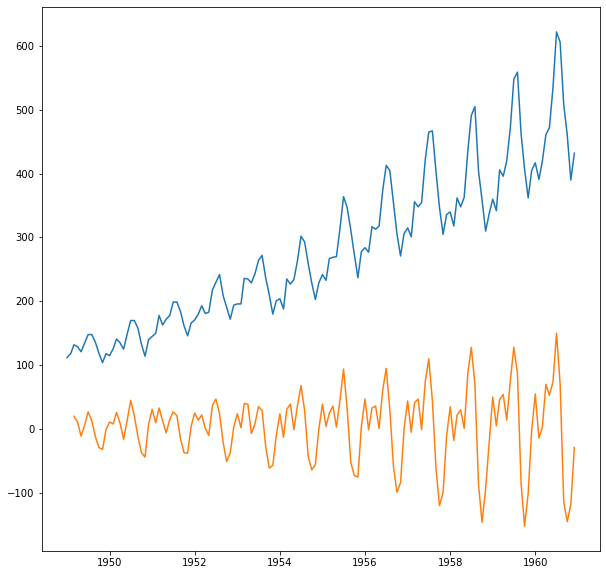

In [266]:
#Ploting our data to see how it looks, and seeing that it is non-stationary data

plt.figure(figsize=(10,10))
plt.plot(dataset_ts["#Passengers"])

#plt.plot(dataset_ts['#Passengers'].diff(1))
plt.plot(dataset_ts['#Passengers'].diff(2)) #second plot is data after detrending

In [270]:
dataset_ts['#Passengers'].diff(2).dropna()

Month
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
1949-06-01      6.0
1949-07-01     27.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 142, dtype: float64

In [9]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# 2. Decomposition of Time Series

In [ ]:
#Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
#The seasonal_decompose in statsmodels implements this conveniently.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
#??seasonal_decompose

In [11]:
pd.Series(dataset_ts["#Passengers"])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

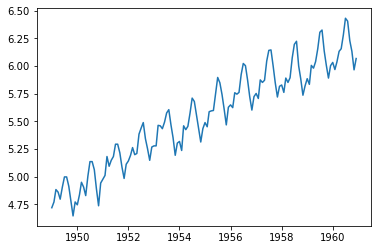

In [12]:
#Because of the data is big magnitute we try to bring it to be smaller magitute by processing log function

ts_log = np.log(dataset_ts)
plt.plot(ts_log)

In [14]:
??seasonal_decompose

In [15]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

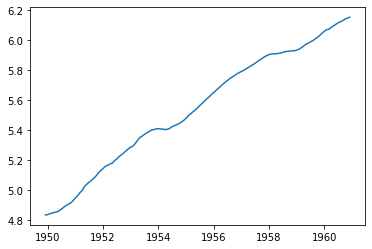

In [16]:
plt.plot(ts_log.rolling(12).mean())

In [17]:
residual.head(100)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1956-12-01   -0.008792
1957-01-01   -0.004277
1957-02-01   -0.032018
1957-03-01   -0.008046
1957-04-01   -0.010242
Name: resid, Length: 100, dtype: float64

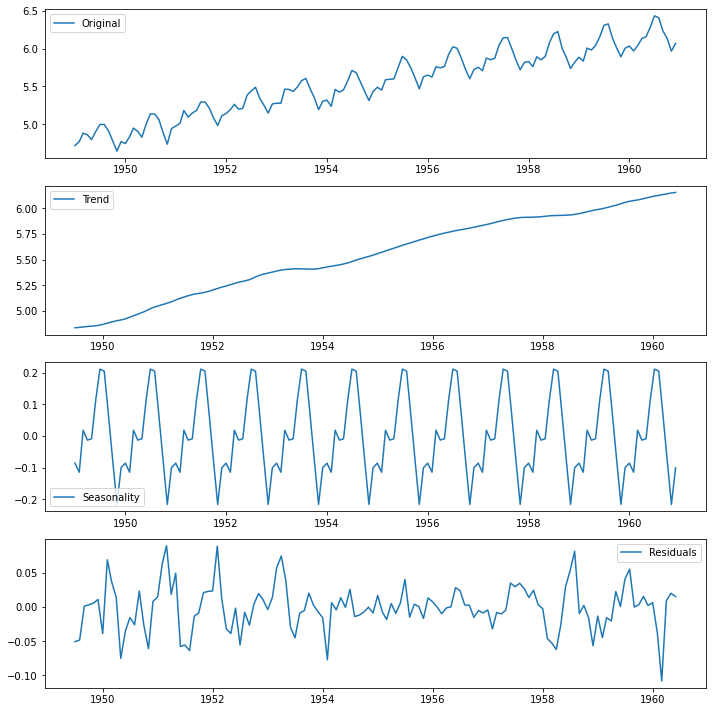

In [18]:

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

# 3. Making Data from non-stationarity to stationarity by

#A. differencing by shifting window 12 because of the cycle is 12 months

In [19]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [20]:
pd.concat([dataset_ts["#Passengers"],dataset_ts.shift(1)["#Passengers"],dataset_ts.shift(12)["#Passengers"]],axis=1)

,#Passengers,#Passengers,#Passengers
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,NaN
1949-04-01,129,132.0,NaN
1949-05-01,121,129.0,NaN
...,...,...,...
1960-08-01,606,622.0,559.0
1960-09-01,508,606.0,463.0
1960-10-01,461,508.0,407.0


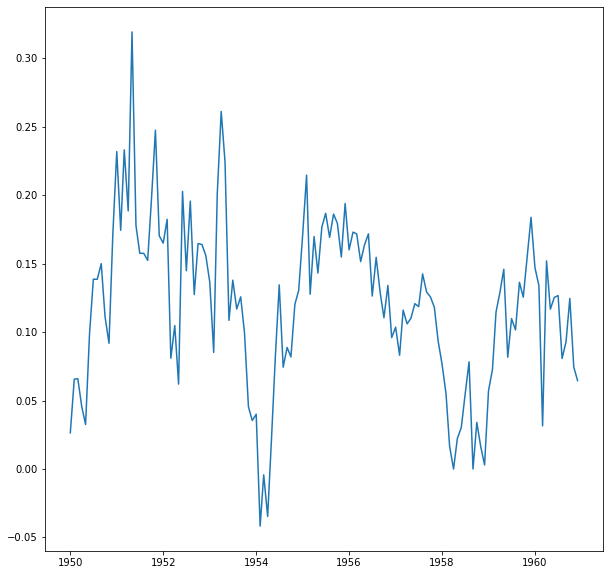

In [21]:
plt.figure(figsize=(10,10))
plt.plot(np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"]))

In [22]:
ts_log_diff = np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"])

In [23]:
ts_log_diff.dropna(inplace=True)

In [24]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [25]:
pd.concat([dataset_ts["#Passengers"],dataset_ts["#Passengers"].rolling(window=3).mean()],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


In [26]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


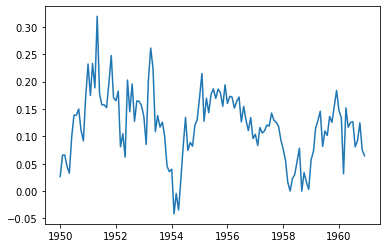

In [27]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift(12)
plt.plot(ts_log_diff)

In [28]:
#A.1. DIFFRENCING by shifting window 2 to see it is still non-stationary

pd.concat([ts_log["#Passengers"] , ts_log["#Passengers"].shift(2)],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,4.718499
1949-04-01,4.859812,4.770685
1949-05-01,4.795791,4.882802
...,...,...
1960-08-01,6.406880,6.282267
1960-09-01,6.230481,6.432940
1960-10-01,6.133398,6.406880


In [29]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [30]:
from datetime import datetime

datetime(1949,4,7)

datetime.datetime(1949, 4, 7, 0, 0)

# 4. Testing data whether it is stationary or not

In [ ]:
#After making data to be stationary we are not sure that it is a stationary or not, we need to test it by using the following approach.
#1.Rolling metrics
#2.ADF -- augmented dickey fuller test
#3.KPSS test
#4.PP test
#---------------------------------------------------------------------------------
#Adfuller testing or Hypothesis Testing is the most favorite use of tesing

In [31]:
from statsmodels.tsa.stattools import adfuller

In [35]:
ts_log_diff.dropna(inplace=True)

In [37]:
adfuller(ts_log_diff)

(-2.70957681898857,
 0.07239567181769463,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)

In [38]:
ma = ts_log_diff.rolling(window=12).mean()
ms= ts_log_diff.rolling(window=12).std()

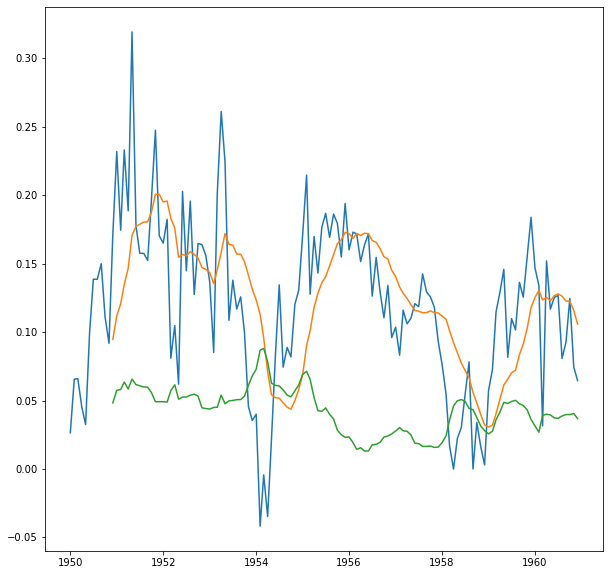

In [39]:
plt.figure(figsize=(10,10))
plt.plot(ts_log_diff)
plt.plot(ma)
plt.plot(ms)

In [40]:
from statsmodels.tsa.stattools import adfuller
#hypothesis test

#H0  -- not stationery  (reject NULL HYPOTHESIS)  --- p-value <.05 (reject)
#HA  -- stationery  (accept)
#??adfuller

In [41]:
ts_log_diff.dropna(inplace=True)
adfuller(ts_log_diff, autolag='AIC')

(-2.70957681898857,
 0.07239567181769463,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)

In [42]:
#abstract the complexity from end user: to make it easy for future testing with the same differenciation approach we create function as below:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
   # rolmean = pd.rolling_mean(timeseries, window=12)

    #rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    print("--------------------------------------------")
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:') 
    
    dftest = adfuller(timeseries, autolag='AIC')
    #PP
    #KPSS
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    #for key,value in dftest[4].items():
        #dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [44]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

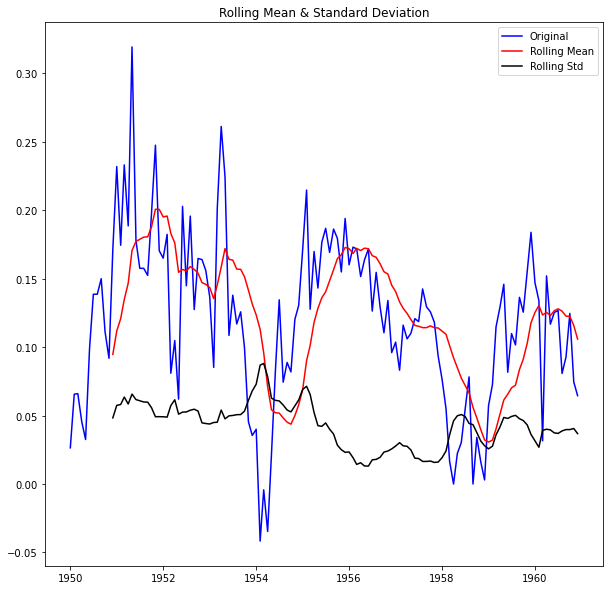

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
dtype: float64


In [45]:
test_stationarity(ts_log_diff)


# as we can see above that p-value is
## p-value             =             0.072396

# we can't reject NULL Hypothesis, i.e.
## timeseries is NOT Stationery

 ## Further Try to make it stationery using different approach now

In [ ]:
#A.2. DIFFRENCING by Moving Average

In [46]:
ts_log_diff_ma = ts_log - ts_log.rolling(window=12).mean()
ts_log_diff_ma

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [47]:
ts_log_diff_ma.dropna(inplace=True)

In [48]:
ts_log_diff_ma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


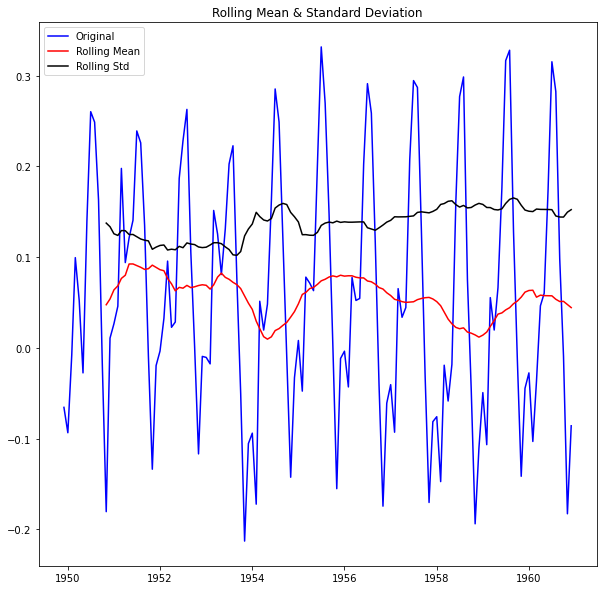

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64


In [49]:
test_stationarity(ts_log_diff_ma["#Passengers"])

# as we can see above that p-value is
## p-value             =             0.022235

# we can reject NULL Hypothesis, i.e.
## timeseries is NOW Stationery

In [ ]:
#A.3. Alternative approach by using Exponential Moving Average

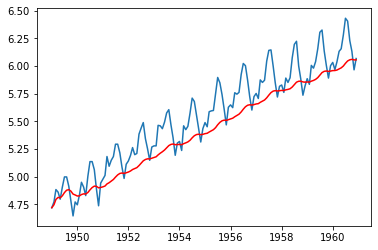

In [50]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)

expwighted_avg = ts_log.ewm( halflife=12).mean()

## ??df_test_ewma = df_test.ewm(span=2).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [51]:
ts_log_ewma_diff = ts_log - expwighted_avg

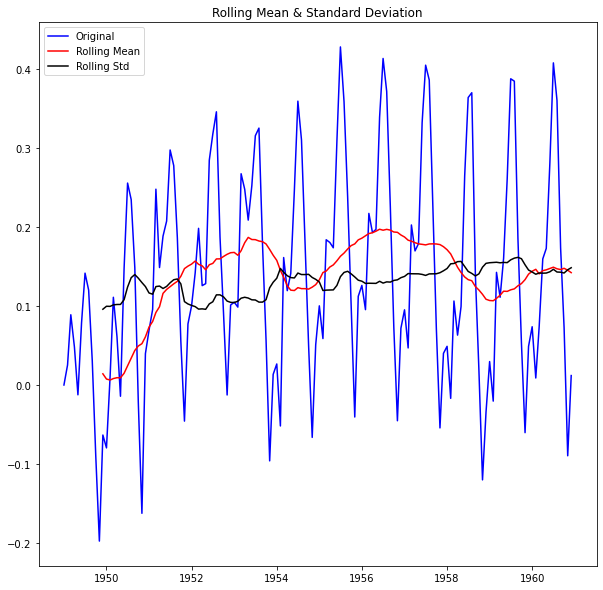

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [52]:
#ts_log_moving_avg_diff
test_stationarity(ts_log_ewma_diff["#Passengers"])

# Now as we can see above that p-value is
# p-value=0.005
# we can reject NULL Hypothesis, i.e.
# timeseries is NOW Stationery

In [ ]:
#A.4. Alternative approach by using Residual

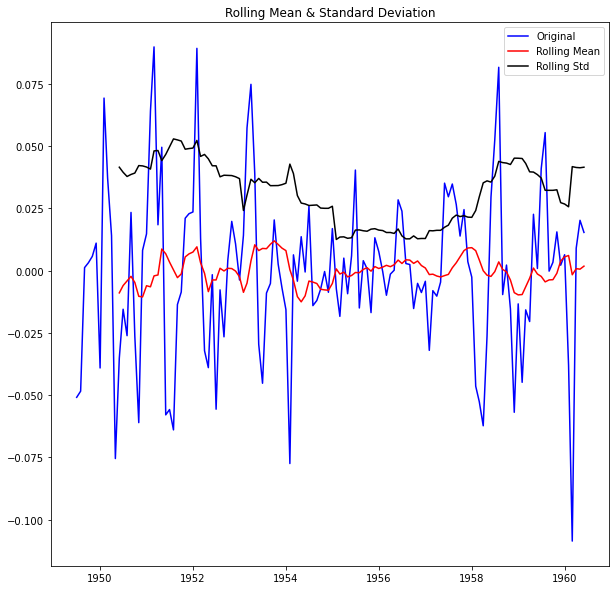

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64


In [53]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

test_stationarity(ts_log_decompose)

# -----------------------------------------------------------------------------------------

# Once the data become stationary it is time to build model to run forcasting. Below there are some models that we will use and compare which models can give us better result. Below are the time series ML model that we will study:

1. Main Models
    * AR (PACF)
    * MA (ACF)
    * ARMA
    * ARIMA
    * SARIMA


2. EXPONENTIAL SMOTHING
    * EM model
      #1. Single when data no trend and seasonality
      #2. Double when data has only trend
      #3. Triple when data have trend and seasonality
    * EM -- HOLT WINTERS MODEL


3. Nueral Networks (We will not cover in this time series lecture)
    * RNN
    * LSTM

#Before we go to each model, let understand what is ACF and PACF? how it is important for running the model?

# ACF and PACF

In [54]:
ts_log_diff.dropna()

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [55]:
from statsmodels.tsa.stattools import acf, pacf

In [56]:
lag_acf = acf(ts_log_diff, nlags=20)

lag_pacf = pacf(ts_log_diff, nlags=20)

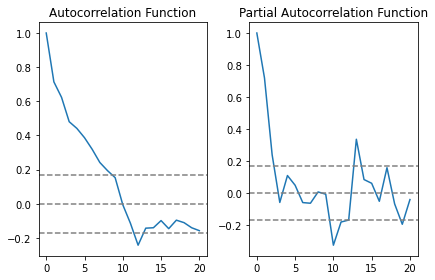

In [57]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [58]:
import matplotlib.pyplot as pyplot

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

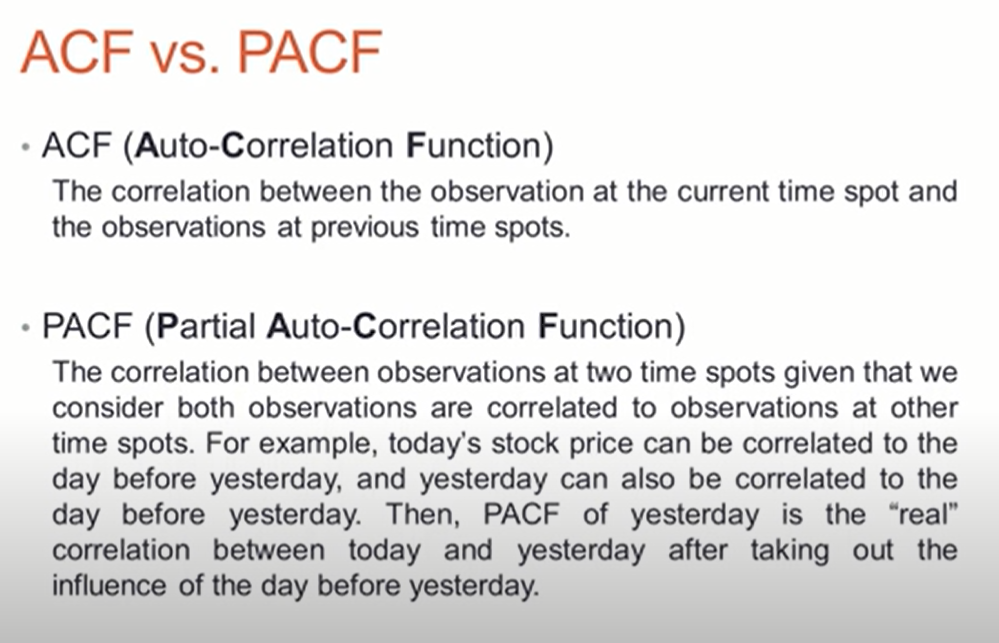

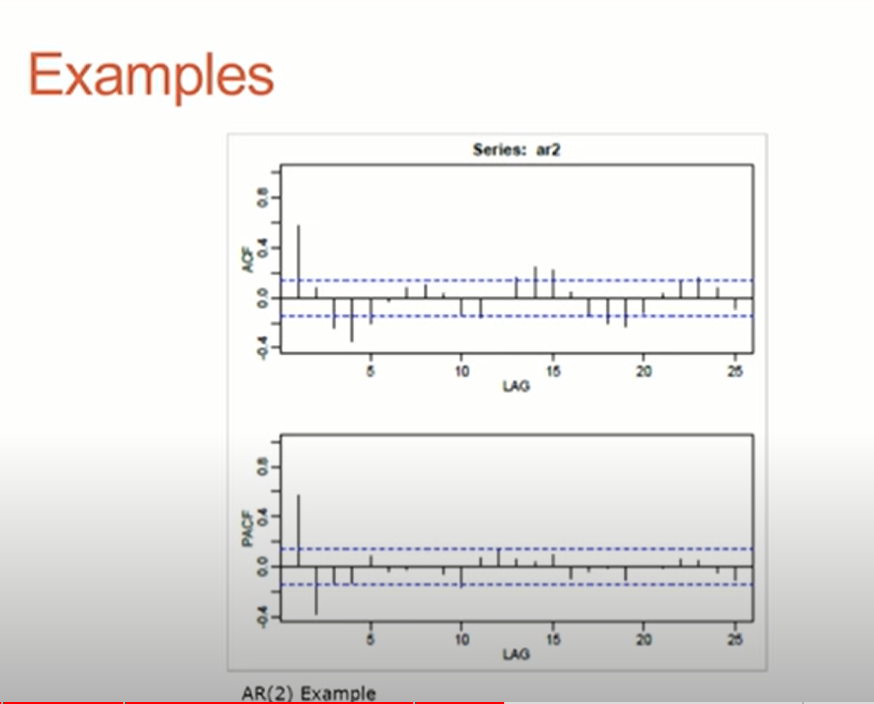

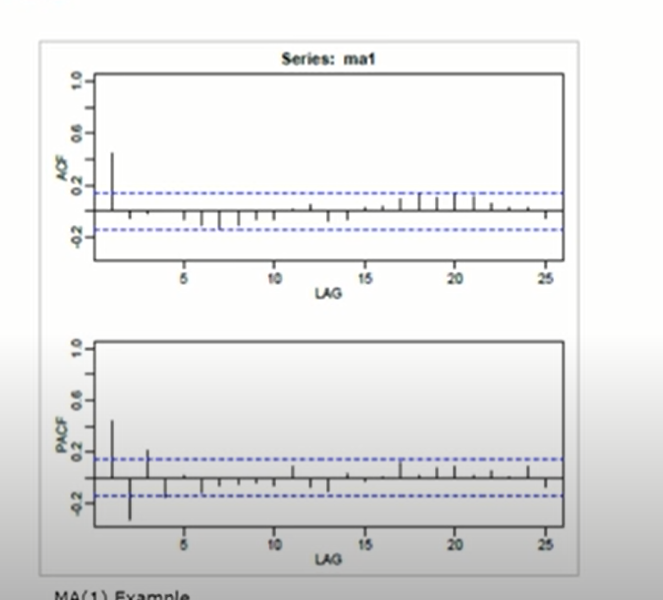

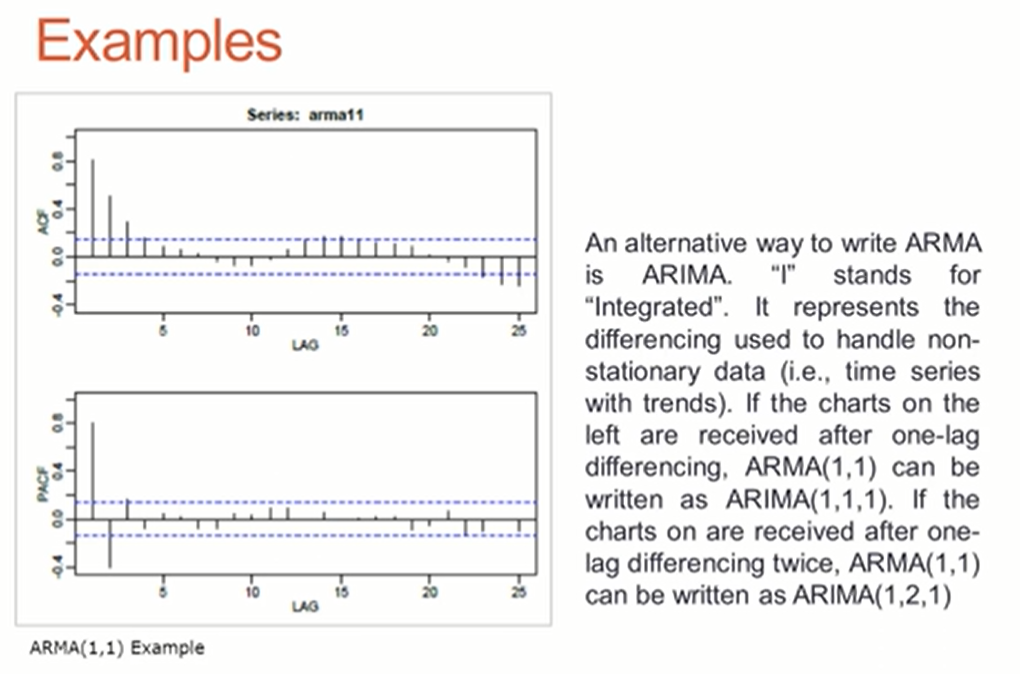

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


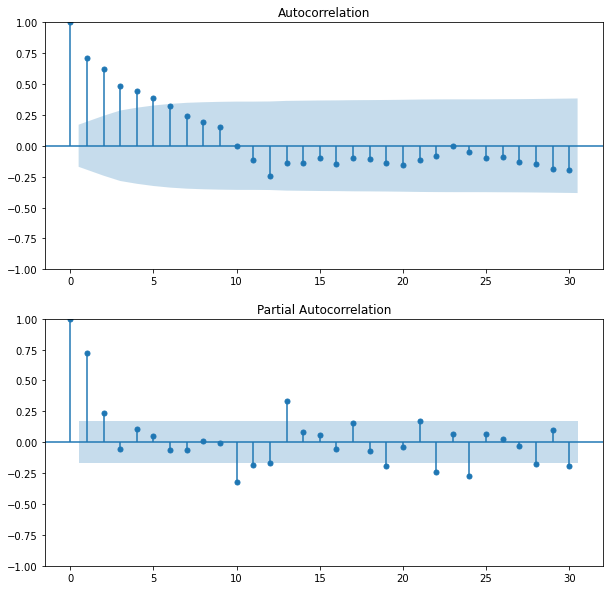

In [59]:
pyplot.figure(figsize=(10,10))
pyplot.subplot(211)

plot_acf(ts_log_diff, ax=pyplot.gca(), lags = 30)

pyplot.subplot(212)

plot_pacf(ts_log_diff, ax=pyplot.gca(), lags = 30)

pyplot.show()



In [60]:
ts_log_diff_ma.dropna(inplace=True)

In [61]:
dataset_ts.head(50)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


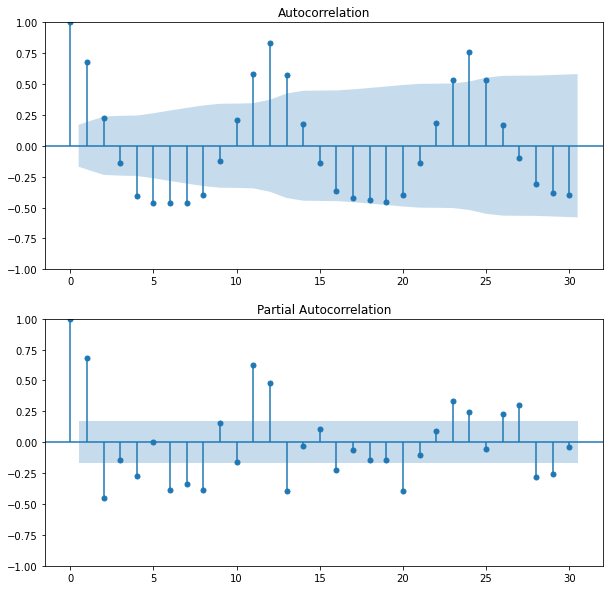

In [62]:
pyplot.figure(figsize=(10,10))
pyplot.subplot(211)

plot_acf(ts_log_diff_ma, ax=pyplot.gca(), lags = 30)
#ARMA -- ARIMA  -- lags
#exponential decay of data lags


pyplot.subplot(212)

plot_pacf(ts_log_diff_ma, ax=pyplot.gca(), lags = 30)

pyplot.show()


#AR == 
#yt = yt-1 B + .......yt-n Bn  --- n lag=previous

#coeeficients

#MA

#ACF = 2
#PACF = 3

# 5. Modelling

# ML Models

In [ ]:
#ARIMA

In [189]:
from statsmodels.tsa.arima.model import  ARIMA

from random import random

??ARIMA

In [64]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [65]:
(dataset_ts) - dataset_ts.shift(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,47.0
1960-09-01,45.0
1960-10-01,54.0


In [116]:
ts_log_diff_ma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [117]:
model = ARIMA(ts_log_diff_ma , order=(3,12,0))  #hyper parameters if we want to use only AR model order parameter will be order=(3,0,0)
AR 
MA
AR+MA


AR+I+MA  === trend   == Integrated --- I=1 


SARIMA (p,d,q) (m=12)


#results_AR = model.fit()  
#AR =p
#I =d
#MA =q

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [192]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [118]:
ts_log_diff_ma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
#SPLITTING DATA to Train Test split

In [119]:
traindata = ts_log_diff_ma[:"1959-12-01"]

testdata = ts_log_diff_ma["1960-01-01":]

In [135]:
testdata

,#Passengers
Month,
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363
1960-09-01,0.098235


In [227]:
model = ARIMA(ts_log_diff_ma , order=(3,0,3))  #ARMA

result = model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

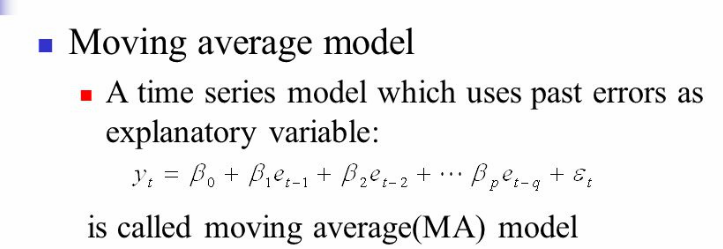

In [228]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  133
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 155.074
Date:                Sat, 04 Feb 2023   AIC                           -294.148
Time:                        21:10:01   BIC                           -271.025
Sample:                    12-01-1949   HQIC                          -284.751
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0544      0.006      8.897      0.000       0.042       0.066
ar.L1          0.9940      0.090     11.093      0.000       0.818       1.170
ar.L2          0.2860      0.155      1.841      0.066      -0.019       0.590
ar.L3         -0.7365      0.090     -8.163      0.000      -0.913      -0.560
ma.L1         -0.7355      0.160     -4.588      0.000      -1.050      -0.421
ma.L2         -0.7845      0.250     -3.137      0.002      -1.275      -0.294
ma.L3          0.9446      0.152      6.234      0.000       0.648       1.242
sigma2         0.0051      0.001      6.194      0.000       0.003       0.007
===================================================================================
Ljung-Box (L1) (Q):                   7.40   Jarque-Bera (JB):                 4.94
Prob(Q):                              0.01   Prob(JB):                         0.08
Heteroskedasticity (H):               1.16   Skew:                            -0.39
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [229]:
#custom model
#y = 0.8699*(t-1) +  -0.3574 *(t-2) + -0.2657*(t-3)

result.fittedvalues

Month
1949-12-01    0.054393
1950-01-01   -0.012969
1950-02-01   -0.024437
1950-03-01    0.036939
1950-04-01    0.113285
                ...   
1960-08-01    0.202308
1960-09-01    0.172242
1960-10-01    0.017099
1960-11-01   -0.012179
1960-12-01   -0.154494
Length: 133, dtype: float64

In [215]:
output = result.predict(start=121, end=132)
output

1960-01-01   -0.071660
1960-02-01   -0.113294
1960-03-01    0.010181
1960-04-01    0.055653
1960-05-01    0.167862
1960-06-01    0.200174
1960-07-01    0.231587
1960-08-01    0.188944
1960-09-01    0.132446
1960-10-01    0.040994
1960-11-01   -0.034069
1960-12-01   -0.093153
Freq: MS, Name: predicted_mean, dtype: float64

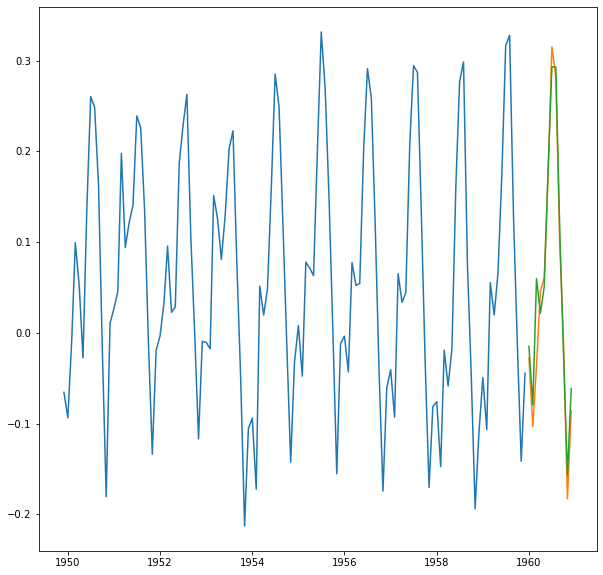

In [231]:
plt.figure(figsize=(10,10))
plt.plot(traindata)
plt.plot(testdata)
plt.plot(output)

In [ ]:
#SARIMAX

In [206]:
#from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [217]:
#Canova-Hansen test for D

#model = ARIMA(traindata, order=(3, 2, 3))

model = SARIMAX(traindata, order=(p,d,q), seasonal_order=(P,D,Q,m))

model_fit = model.fit(disp=False)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likel

In [218]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  121
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 12)   Log Likelihood                 223.896
Date:                            Sat, 04 Feb 2023   AIC                           -421.792
Time:                                    21:00:47   BIC                           -385.446
Sample:                                12-01-1949   HQIC                          -407.030
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6253      1.602      0.390      0.696      -2.515       3.766
ar.L2         -0.2175      0.707     -0.308      0.758      -1.602       1.167
ar.L3          0.1603      0.303      0.529      0.597      -0.434       0.754
ma.L1         -0.0244      1.603     -0.015      0.988      -3.166       3.117
ma.L2          0.4643      0.454      1.022      0.307      -0.426       1.355
ma.L3         -0.1137      0.542     -0.210      0.834      -1.176       0.948
ar.S.L12      -0.2641      2.215     -0.119      0.905      -4.605       4.076
ar.S.L24       0.5331      2.238      0.238      0.812      -3.854       4.920
ar.S.L36       0.7080      1.870      0.379      0.705      -2.957       4.373
ma.S.L12       0.6771      2.238      0.303      0.762      -3.709       5.064
ma.S.L24      -0.0756      1.812     -0.042      0.967      -3.628       3.476
ma.S.L36      -0.4688      1.048     -0.447      0.655      -2.524       1.586
sigma2         0.0011      0.000      6.959      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.98   Prob(JB):                         0.19
Heteroskedasticity (H):               0.40   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

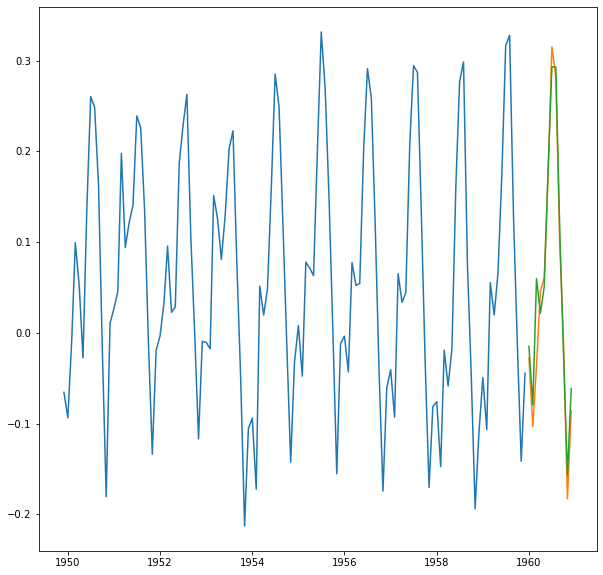

In [222]:
output = model_fit.predict(start=121, end=132)
output
plt.figure(figsize=(10,10))
plt.plot(traindata)
plt.plot(testdata)
plt.plot(output)

In [163]:
import numpy as np

RMSE = np.sqrt(np.mean((testdata["#Passengers"] - output)**2))

RMSE

0.12979885888149584

In [146]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testdata["#Passengers"] , output))

0.07002983882492606

In [143]:
#output.cumsum()

1960-01-01   -0.035983
1960-02-01   -0.115490
1960-03-01   -0.133869
1960-04-01   -0.071725
1960-05-01    0.069182
1960-06-01    0.266568
1960-07-01    0.483593
1960-08-01    0.678584
1960-09-01    0.815938
1960-10-01    0.875361
1960-11-01    0.857044
1960-12-01    0.781447
Freq: MS, Name: predicted_mean, dtype: float64

In [147]:
predicteddata = result.predict(start=133, end=180)
predicteddata

1961-01-01   -0.097637
1961-02-01   -0.078965
1961-03-01   -0.024769
1961-04-01    0.050541
1961-05-01    0.127160
1961-06-01    0.185095
1961-07-01    0.209385
1961-08-01    0.193957
1961-09-01    0.143145
1961-10-01    0.070476
1961-11-01   -0.004927
1961-12-01   -0.063379
1962-01-01   -0.089769
1962-02-01   -0.077465
1962-03-01   -0.029977
1962-04-01    0.040035
1962-05-01    0.114136
1962-06-01    0.172971
1962-07-01    0.201314
1962-08-01    0.192013
1962-09-01    0.147787
1962-10-01    0.080442
1962-11-01    0.007722
1962-12-01   -0.051366
1963-01-01   -0.081521
1963-02-01   -0.075103
1963-03-01   -0.034071
1963-04-01    0.030602
1963-05-01    0.101867
1963-06-01    0.161087
1963-07-01    0.192912
1963-08-01    0.189256
1963-09-01    0.151351
1963-10-01    0.089347
1963-11-01    0.019605
1963-12-01   -0.039628
1964-01-01   -0.072987
1964-02-01   -0.071974
1964-03-01   -0.037121
1964-04-01    0.022217
1964-05-01    0.090375
1964-06-01    0.149510
1964-07-01    0.184269
1964-08-01 

In [79]:
# np.exp(traindata.cumsum() )

In [80]:
traindata

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-08-01,0.327838
1959-09-01,0.128057
1959-10-01,-0.011315


In [81]:
#p q
#model = ARMA(ts_log, order=(2, 0))  


#model = ARMA(ts_log, order=(3, 2))


#p d q

model = ARIMA((dataset_ts) , order=(1,2,1))  


#acf and pacf

results_AR = model.fit()  

#missing="drop"

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
results_AR.fittedvalues

Month
1949-01-01      0.000000
1949-02-01    168.013789
1949-03-01    124.052927
1949-04-01    143.283931
1949-05-01    131.314091
                 ...    
1960-08-01    651.959957
1960-09-01    603.397055
1960-10-01    479.057651
1960-11-01    447.891089
1960-12-01    368.975026
Length: 144, dtype: float64

In [83]:
results_AR.fittedvalues.cumsum() + 4.718499 

Month
1949-01-01        4.718499
1949-02-01      172.732288
1949-03-01      296.785215
1949-04-01      440.069146
1949-05-01      571.383237
                  ...     
1960-08-01    38411.291349
1960-09-01    39014.688405
1960-10-01    39493.746055
1960-11-01    39941.637145
1960-12-01    40310.612171
Length: 144, dtype: float64

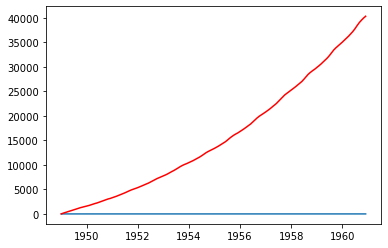

In [84]:
plt.plot(ts_log)

plt.plot(results_AR.fittedvalues.cumsum() + 4.718499 ,color='red')


#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [85]:
model = ARIMA(ts_log, order=(2, 0,0)) 

results_AR = model.fit()  

results_AR.fittedvalues


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1949-01-01    5.505023
1949-02-01    4.737222
1949-03-01    4.803657
1949-04-01    4.925838
1949-05-01    4.873475
                ...   
1960-08-01    6.439442
1960-09-01    6.374843
1960-10-01    6.170148
1960-11-01    6.093526
1960-12-01    5.915539
Length: 144, dtype: float64

In [86]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [87]:
train_ERROR = ts_log["#Passengers"] - results_AR.fittedvalues #--->>>> ACC/RMSE
train_ERROR

Month
1949-01-01   -0.786524
1949-02-01    0.033462
1949-03-01    0.079145
1949-04-01   -0.066025
1949-05-01   -0.077685
                ...   
1960-08-01   -0.032562
1960-09-01   -0.144361
1960-10-01   -0.036750
1960-11-01   -0.127379
1960-12-01    0.152886
Length: 144, dtype: float64

In [88]:
#future prediction

predictions = results_AR.predict(start=144, end=700)
predictions

1961-01-01    6.074774
1961-02-01    6.059606
1961-03-01    6.040096
1961-04-01    6.020188
1961-05-01    6.000771
                ...   
2007-01-01    5.505023
2007-02-01    5.505023
2007-03-01    5.505023
2007-04-01    5.505023
2007-05-01    5.505023
Freq: MS, Name: predicted_mean, Length: 557, dtype: float64

In [89]:
#reversing log transformation
prediction_values = np.exp(results_AR.predict(start=143, end=200))

prediction_values

1960-12-01    370.754215
1961-01-01    434.751136
1961-02-01    428.206875
1961-03-01    419.933488
1961-04-01    411.656108
1961-05-01    403.739998
1961-06-01    396.243150
1961-07-01    389.155992
1961-08-01    382.455485
1961-09-01    376.117201
1961-10-01    370.117897
1961-11-01    364.435965
1961-12-01    359.051414
1962-01-01    353.945749
1962-02-01    349.101850
1962-03-01    344.503851
1962-04-01    340.137036
1962-05-01    335.987739
1962-06-01    332.043257
1962-07-01    328.291770
1962-08-01    324.722272
1962-09-01    321.324499
1962-10-01    318.088879
1962-11-01    315.006467
1962-12-01    312.068907
1963-01-01    309.268378
1963-02-01    306.597561
1963-03-01    304.049593
1963-04-01    301.618042
1963-05-01    299.296869
1963-06-01    297.080403
1963-07-01    294.963313
1963-08-01    292.940587
1963-09-01    291.007503
1963-10-01    289.159619
1963-11-01    287.392744
1963-12-01    285.702927
1964-01-01    284.086440
1964-02-01    282.539762
1964-03-01    281.059566


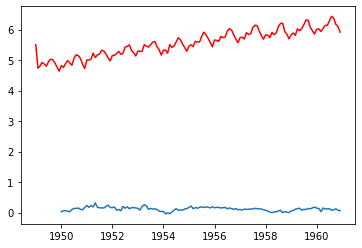

In [90]:
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


In [91]:
model = ARIMA(ts_log, order=(0, 1, 2))  

results_MA = model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


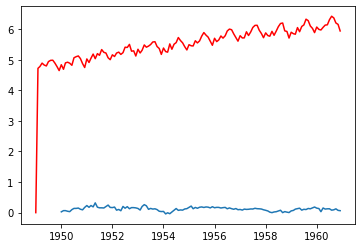

In [92]:
plt.plot(ts_log_diff)

plt.plot(results_MA.fittedvalues, color='red')

#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [93]:
##p d q values are 2 1 2
model = ARIMA(ts_log, order=(2, 1, 2))  


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [94]:
results_ARIMA = model.fit()  

In [95]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Sat, 04 Feb 2023   AIC                           -247.780
Time:                        18:51:05   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.464      -0.319       0.145
ma.L2         -0.6813      0.142     -4.786      0.000      -0.960      -0.402
sigma2         0.0096      0.002      5.730      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
results_ARIMA.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.2431,0.166,1.469,0.142,-0.081,0.568
ar.L2,0.2677,0.199,1.344,0.179,-0.123,0.658
ma.L1,-0.0867,0.118,-0.732,0.464,-0.319,0.145
ma.L2,-0.6813,0.142,-4.786,0.000,-0.960,-0.402
sigma2,0.0096,0.002,5.730,0.000,0.006,0.013


In [97]:
#results_ARIMA.plot_diagnostics()

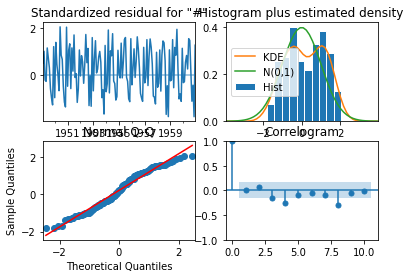

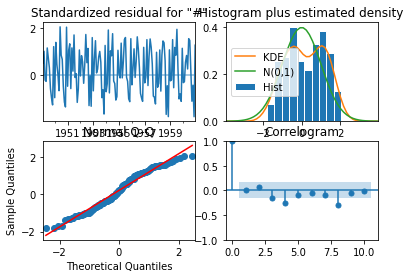

In [98]:
results_ARIMA.plot_diagnostics()

In [99]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

Text(0.5, 1.0, 'RSS: nan')

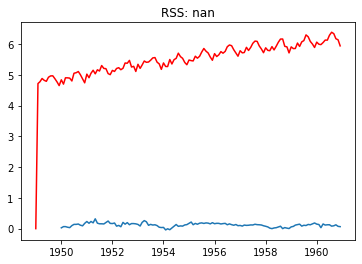

In [100]:
plt.plot(ts_log_diff)

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [101]:
results_ARIMA.fittedvalues

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824423
                ...   
1960-08-01    6.387728
1960-09-01    6.341444
1960-10-01    6.177189
1960-11-01    6.141965
1960-12-01    5.944569
Length: 144, dtype: float64

In [102]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [103]:
print(predictions_ARIMA_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824423
dtype: float64


In [104]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378099
1949-05-01    19.202522
dtype: float64

In [ ]:
#AUTO ARIMA

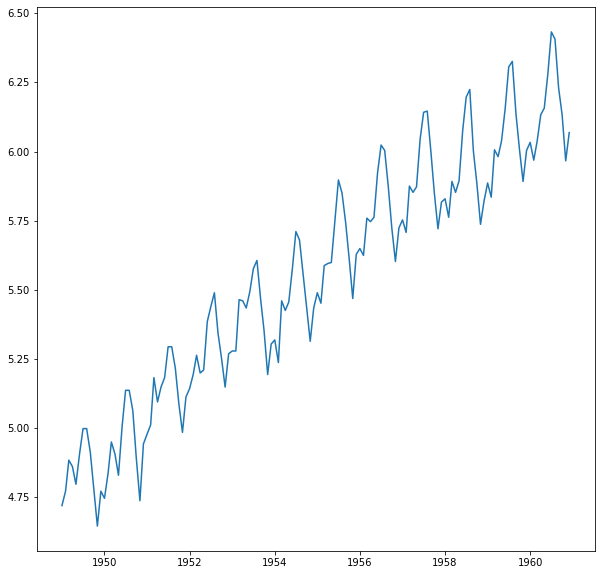

In [168]:
plt.figure(figsize=(10,10))

plt.plot(ts_log)

In [167]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [258]:
#building the model
#
#PYRAMID PACKAGE

#from pyramid.arima import auto_arima

from pmdarima.arima import auto_arima

model = auto_arima(ts_log, d=None,trace=True, error_action='ignore', suppress_warnings=True)

#https://alkaline-ml.com/pmdarima/tips_and_tricks.html

###stepwise 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-262.595, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.439, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-267.212, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-269.849, Time=0.52 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-269.823, Time=0.54 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-250.735, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : 

In [235]:
model

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

In [239]:
#pip install pyramid-arima

In [240]:
output = model.predict(start=121, end=132)
output

1961-01-01    6.216701
1961-02-01    6.289679
1961-03-01    6.397993
1961-04-01    6.430967
1961-05-01    6.354463
1961-06-01    6.331961
1961-07-01    6.313158
1961-08-01    6.267297
1961-09-01    6.306310
1961-10-01    6.355743
Freq: MS, dtype: float64

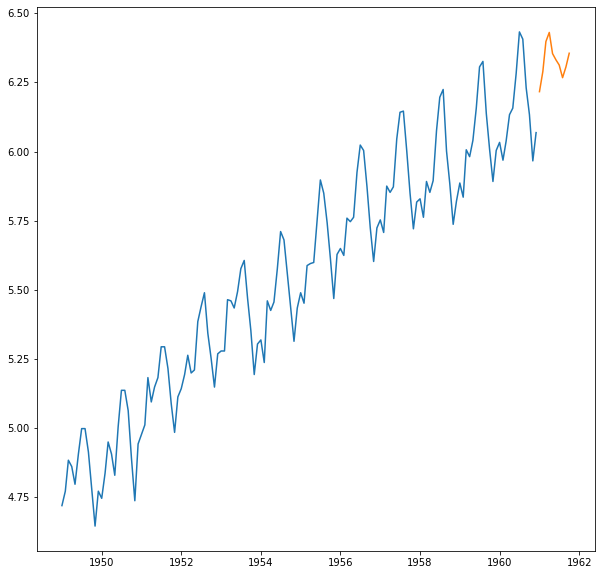

In [241]:
plt.figure(figsize=(10,10))
plt.plot(ts_log)
#plt.plot(model.fittedvalues())
plt.plot(output)

In [ ]:
#ts_log_imputed

In [253]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(ts_log, max_d=1,trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=1,information_criterion='bic')

###stepwise 

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=-244.818, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-225.639, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-226.497, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-228.619, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-229.476, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=-252.398, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-229.756, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=-225.753, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=-252.072, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=-222.138, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : BIC=-249.083, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : BIC=-239.612, Time=0.19 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.138 seconds


In [ ]:
#https://www.rdocumentation.org/packages/forecast/versions/8.1/topics/ndiffs
    
    #"kpss", "adf", "pp"

In [254]:
??auto_arima

In [171]:
model.fit(ts_log)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [173]:
model.fittedvalues()

Month
1949-01-01    0.118508
1949-02-01    0.118508
1949-03-01    0.118508
1949-04-01    0.118508
1949-05-01    0.118508
                ...   
1960-08-01    6.441895
1960-09-01    6.245401
1960-10-01    6.106633
1960-11-01    5.998531
1960-12-01    6.091128
Length: 144, dtype: float64

In [179]:
output = model.predict(start=121, end=132)
output

1961-01-01    6.114323
1961-02-01    6.062638
1961-03-01    6.185861
1961-04-01    6.218010
1961-05-01    6.255224
1961-06-01    6.394813
1961-07-01    6.536400
1961-08-01    6.534604
1961-09-01    6.358631
1961-10-01    6.245013
Freq: MS, dtype: float64

In [245]:
np.exp(output)

1961-01-01    501.047571
1961-02-01    538.980299
1961-03-01    600.638590
1961-04-01    620.774116
1961-05-01    575.053615
1961-06-01    562.258303
1961-07-01    551.784561
1961-08-01    527.050741
1961-09-01    548.019285
1961-10-01    575.790037
Freq: MS, dtype: float64

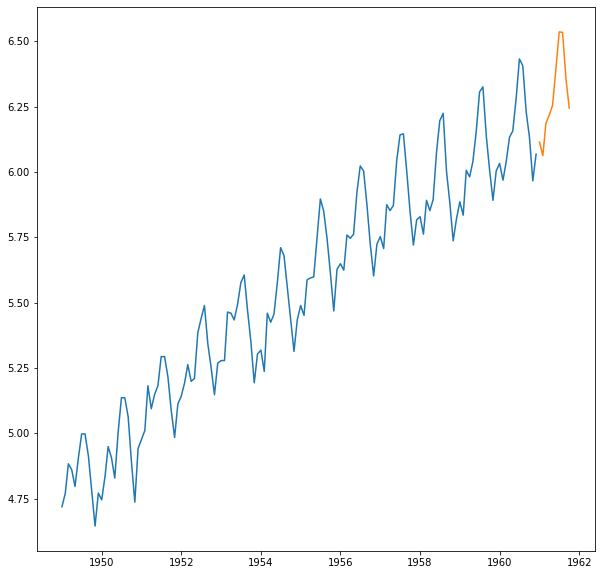

In [182]:
plt.figure(figsize=(10,10))
plt.plot(ts_log)
#plt.plot(model.fittedvalues())
plt.plot(output)

In [112]:
#AIC, BIC, HQIC
#train

In [113]:
### train data last date - 1960-12-01
dti = pd.date_range('1961-01-01', periods=50, freq='MS')
## MS means monthly or monthly start
dti

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [114]:
forecast = model.predict(n_periods=50)
forecast = pd.DataFrame(forecast,index = dti,columns=['Prediction'])
forecast.head()

,Prediction
1961-01-01,0.021407
1961-02-01,0.035573
1961-03-01,0.105669
1961-04-01,0.107788
1961-05-01,0.122185


CONCLUSION:Based on the above result we can see that SARIMAX and Auto-Arima model provided better result with lower